### TP Análisis de Datos
* Dataset: Piezas de Lego a lo largo de los años. 
* Consigna: Predecir temática a partir de las piezas del set.


### Obtención del dataset
El dataset está compuesto por 8 tablas. Aquí presentamos un esquema de los datos que resulta útil para explicar cómo realizamos la obtención del dataset 
 final:

![schemapng](./images/downloads_schema.png)

El objetivo es poder predecir la temática (theme) de un set. A continuación joineamos las tablas que vamos a necesitar para el dataset final.

In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
#cargar dataset
sets = pd.read_csv('./data/sets.csv')
inventory_parts = pd.read_csv('./data/inventory_parts.csv')
inventory_sets = pd.read_csv('./data/inventory_sets.csv')
colors = pd.read_csv('./data/colors.csv')
parts = pd.read_csv('./data/parts.csv')
inventories = pd.read_csv('./data/inventories.csv')
themes = pd.read_csv('./data/themes.csv')

In [3]:
print('Cantidad de set_num en la tabla sets: ', sets['set_num'].value_counts().sum())
print('Cantidad de set_num en la tabla inventory_sets: ', inventory_sets['set_num'].value_counts().sum())
print('Cantidad de set_num en la tabla inventories: ',inventories['set_num'].value_counts().sum())

Cantidad de set_num en la tabla sets:  11673
Cantidad de set_num en la tabla inventory_sets:  2846
Cantidad de set_num en la tabla inventories:  11681


In [4]:
#Renombramos columnas
themes = themes.rename(columns= {'id': 'theme_id'})
colors = colors.rename(columns  = {'id': 'color_id'})
colors = colors.rename(columns  = {'name': 'color_name'})
parts = parts.rename(columns={'name': 'part_name'})
inventory_parts = inventory_parts.rename(columns= {'inventory_id': 'id'})

In [5]:
#Joineamos las tablas
new_themes = pd.merge(sets, themes, on='theme_id', how='inner')
new_sets = pd.merge(new_themes, inventories, on= 'set_num', how='inner')
new_inventory_parts = pd.merge(new_sets, inventory_parts, on='id', how='inner')
new_colors = pd.merge(new_inventory_parts, colors, on='color_id', how='inner')
new_parts = pd.merge(new_inventory_parts, parts, on='part_num', how='inner')

In [6]:
# Concatenamos y borramos las columnas duplicadas
final_df = pd.concat([new_colors, new_parts], axis="columns")
final_df.columns.duplicated()
final_df = final_df.loc[:,~final_df.columns.duplicated()].copy()

In [7]:
final_df.columns

Index(['set_num', 'name_x', 'year', 'theme_id', 'num_parts', 'name_y',
       'parent_id', 'id', 'version', 'part_num', 'color_id', 'quantity',
       'is_spare', 'color_name', 'rgb', 'is_trans', 'part_name',
       'part_cat_id'],
      dtype='object')

In [8]:
#Renombramos columnas para más claridad
final_df = final_df.rename(columns= {'name_x': 'set_name', 'name_y': 'theme_name', 'id': 'inv_id', 'version': 'inv_version'})

In [9]:
final_df.isnull().sum()

set_num             0
set_name            0
year                0
theme_id            0
num_parts           0
theme_name          0
parent_id      207693
inv_id              0
inv_version         0
part_num            0
color_id            0
quantity            0
is_spare            0
color_name          0
rgb                 0
is_trans            0
part_name         182
part_cat_id       182
dtype: int64

In [10]:
# Drop nulls
final_df = final_df.dropna(subset =['part_name'])

In [17]:
import matplotlib.pyplot as plt

In [22]:
quantity = np.array(final_df['quantity'])

(array([4.01122e+05, 9.32740e+04, 5.05110e+04, 2.50630e+04, 7.29200e+03,
        2.16700e+03, 4.69000e+02, 1.32000e+02, 2.80000e+01, 1.10000e+01]),
 array([0.        , 0.31583625, 0.6316725 , 0.94750875, 1.263345  ,
        1.57918125, 1.8950175 , 2.21085374, 2.52668999, 2.84252624,
        3.15836249]),
 <BarContainer object of 10 artists>)

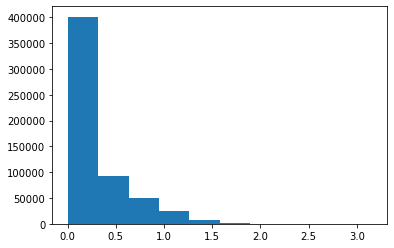

In [23]:
from turtle import title


plt.hist(np.log10(quantity))

In [15]:
final_df.dtypes

set_num         object
set_name        object
year             int64
theme_id         int64
num_parts        int64
theme_name      object
parent_id      float64
inv_id           int64
inv_version      int64
part_num        object
color_id         int64
quantity         int64
is_spare        object
color_name      object
rgb             object
is_trans        object
part_name       object
part_cat_id    float64
dtype: object

In [17]:
os.makedirs('./data', exist_ok=True)  
final_df.to_csv('./data/lego_df.csv', index=False)

In [20]:
final_df['color_id'] 

0         False
1         False
2         False
3         False
4         False
          ...  
580064    False
580065    False
580066    False
580067    False
580068    False
Name: color_id, Length: 580069, dtype: bool

In [26]:
final_df.shape

(580069, 18)